### SETTINGS, IMPORT AND LOAD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler


pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('creditcard.csv')

### OVERVIEW DATA ANALYSIS

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### CHECKING & CORRECTION MISSING VALUES

In [7]:
df.isnull().sum()       # Count the Null Columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### CHECKING & CORRECTION MISMATCHED VALUES

In [8]:
df['hour'] = df.Time / 3600

### EDA - EXPLORATORY DATA ANALYSIS

In [9]:
# print('% FRAUDS X NO FRAUDS')
print('% NO FRAUDS:', round(df.Class.value_counts(normalize=True)[0] *100, 2))     # mostra distribuição do target normalizada
print('% FRAUDS:', round(df.Class.value_counts(normalize=True)[1] *100, 2))     # mostra distribuição do target normalizada

% NO FRAUDS: 99.83
% FRAUDS: 0.17


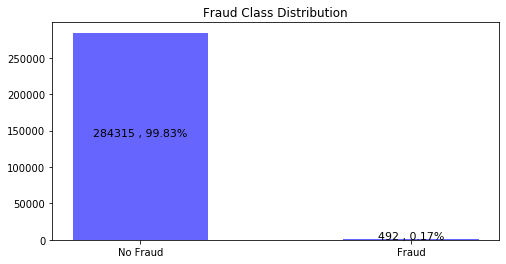

In [10]:
plt.figure(figsize=(8,4))
plt.title('Fraud Class Distribution',  fontsize=12)
xvals = ['No Fraud', 'Fraud']
yvals = df.Class.value_counts().values
bars = plt.bar(xvals, yvals, width=0.5, color='b', alpha=0.6)
for i, bar in enumerate(bars):
    height = bar.get_height()
    width = bar.get_width()
    plt.gca().text(bar.get_x() + width/2, height * (1/2), str(int(height)) + ' , ' + str(round(yvals[i]/len(df)*100,2)) + '%', ha='center',                 color='black', fontsize=11)

### HISTOGRAM - NUMERIC COLUMNS

(array([119112.,  40679.,  22537.,  17495.,  11641.,  10306.,   8033.,
          5569.,   4843.,   4285.,   4218.,   3004.,   2428.,   2690.,
          1912.,   1763.,   1682.,   1368.,   1287.,   1465.]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
        165., 180., 195., 210., 225., 240., 255., 270., 285., 300.]),
 <a list of 20 Patch objects>)

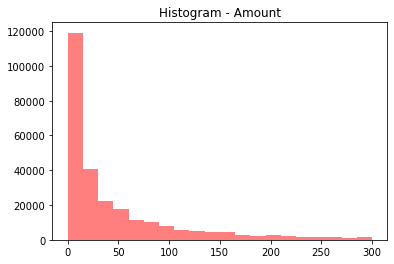

In [11]:
plt.figure()
plt.title('Histogram - Amount')
plt.hist(df[df.Class == 0].Amount, normed=False, range=(0,300), bins=20, color='r', alpha=0.5, label='Churn')

(array([3961., 2215., 1555., 1808., 1076., 1670., 1828., 3345., 5174.,
        7863., 8286., 8474., 7723., 7576., 8016., 7822., 7772., 7870.,
        8592., 7987., 8972., 9881., 8974., 6065., 3728., 1995., 1716.,
        1667., 1110., 1309., 2264., 3875., 5093., 7959., 8304., 8329.,
        7680., 7772., 8531., 8613., 8659., 8267., 8414., 7643., 7766.,
        7806., 6458., 4852.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48.]),
 <a list of 48 Patch objects>)

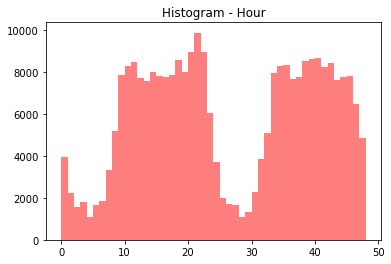

In [12]:
plt.title('Histogram - Hour')
plt.hist(df[df.Class == 0].hour, normed=False, range=(0,48), bins=48, color='r', alpha=0.5, label='Churn')

<Figure size 432x288 with 0 Axes>

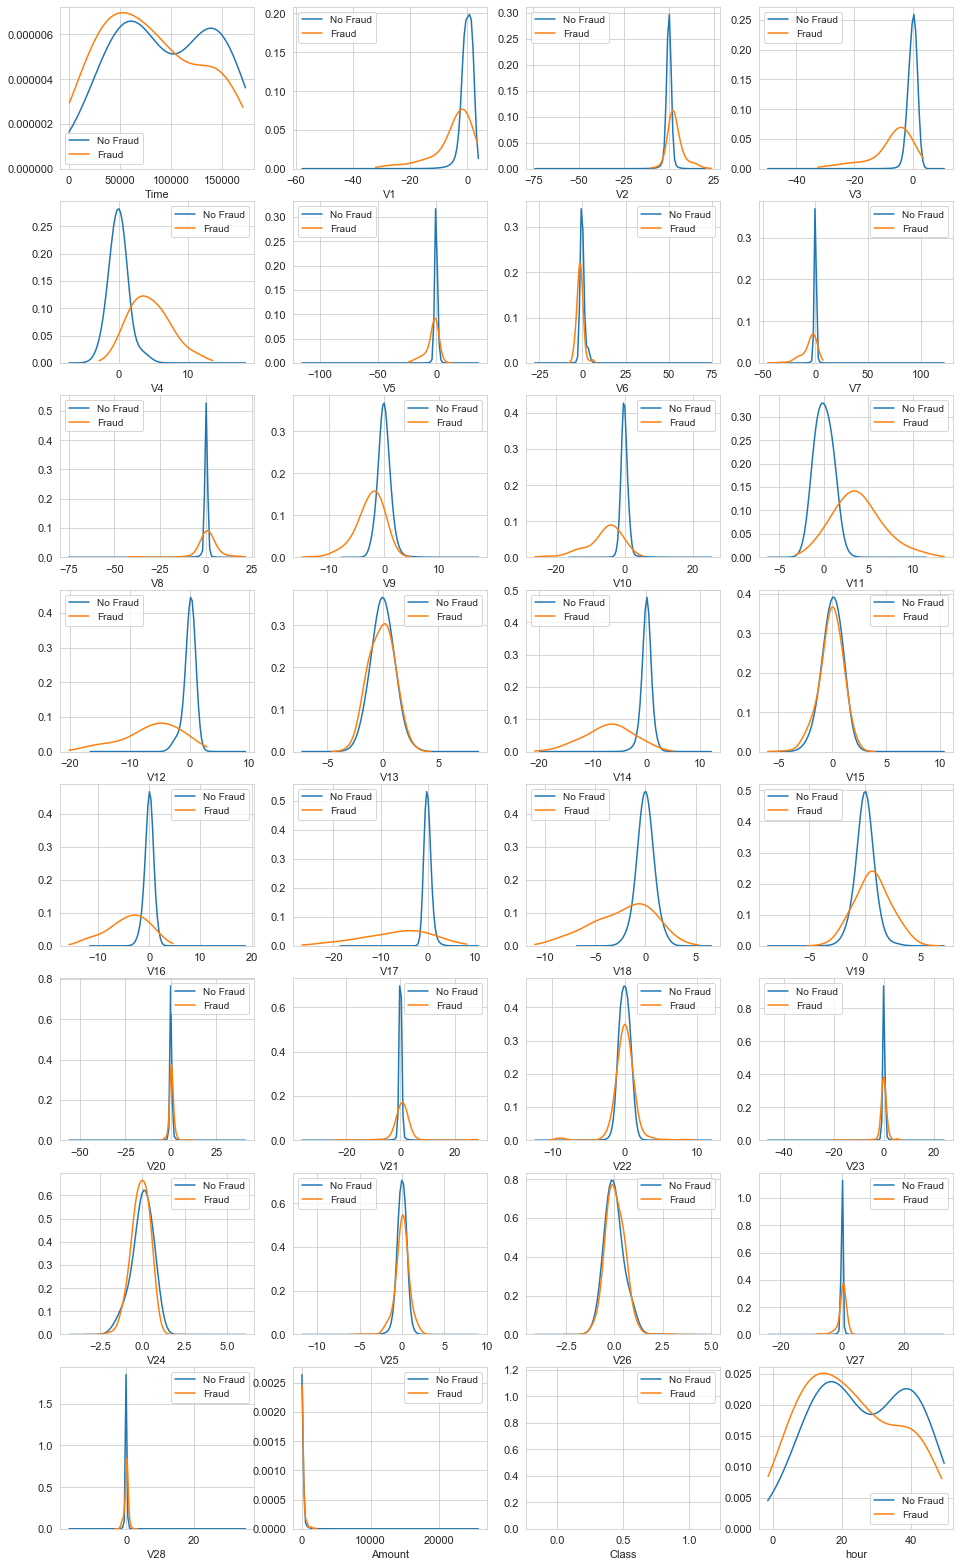

In [13]:
cols = df.columns.values

df_no_fraud = df.loc[df['Class'] == 0]
df_fraud = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for c, feature in enumerate(cols):
    plt.subplot(8,4,c+1)
    sns.kdeplot(df_no_fraud[feature], bw=0.5,label="No Fraud")
    sns.kdeplot(df_fraud[feature], bw=0.5,label="Fraud")
    plt.xlabel(feature, fontsize=11)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=11)
plt.show()

In [14]:
# Criando colunas normalizadas para as variáveis 'amount' e 'time'
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time', 'hour', 'Time','Amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.78,-0.99,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0
1,-0.27,-0.99,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,0
2,4.98,-0.99,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,0
3,1.42,-0.99,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0
4,0.67,-0.99,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,0


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.78,-0.99,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0
1,-0.27,-0.99,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,0
2,4.98,-0.99,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,0
3,1.42,-0.99,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0
4,0.67,-0.99,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,0


### Splitting the Data (Original DataFrame)
Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [16]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
241691,-0.28,0.78,0.03,0.77,0.17,-0.77,0.57,-0.63,0.86,-0.01,-0.20,-0.22,0.39,0.42,-0.58,0.40,-1.02,0.22,-0.74,-0.08,0.33,-0.06,-0.24,-0.56,0.02,-0.36,-0.50,0.14,0.24,0.08,0
6719,-0.29,-0.90,-0.25,4.31,-6.89,6.80,0.62,-2.97,-2.44,0.49,-3.37,-6.81,7.62,-10.29,-0.34,-11.54,-1.33,-2.69,-3.20,0.09,-1.31,0.63,0.54,-0.55,-0.61,-0.26,1.54,0.52,0.89,0.57,1
61596,0.78,-0.41,-0.54,0.50,0.22,0.12,2.66,4.03,0.72,0.47,-0.13,0.44,-0.40,-0.34,-0.26,-0.32,0.29,-0.75,-0.35,0.17,1.50,0.45,-0.23,-0.19,-0.27,1.02,0.38,-0.25,-0.06,-0.27,0
258403,3.83,0.87,-5.98,-7.20,-5.39,5.10,4.68,-5.57,-4.29,0.88,-1.08,-3.27,1.17,-2.13,1.13,-4.57,-0.13,-2.83,-2.87,-0.91,0.42,3.14,1.46,-0.14,0.85,-0.27,-1.10,-0.71,0.57,-1.03,1
30314,-0.20,-0.57,-2.04,3.37,-3.94,5.62,-3.08,-1.25,-5.78,1.71,-4.47,-6.07,3.84,-8.28,1.49,-8.42,0.79,-7.86,-14.57,-5.19,2.41,1.11,1.48,0.83,-0.15,0.00,-0.04,0.39,1.30,0.55,1


Distribution of the Classes in the subsample dataset
1   0.50
0   0.50
Name: Class, dtype: float64


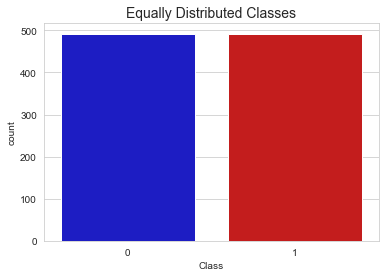

In [17]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Text(0.5, 1, 'Correlation Matrix')

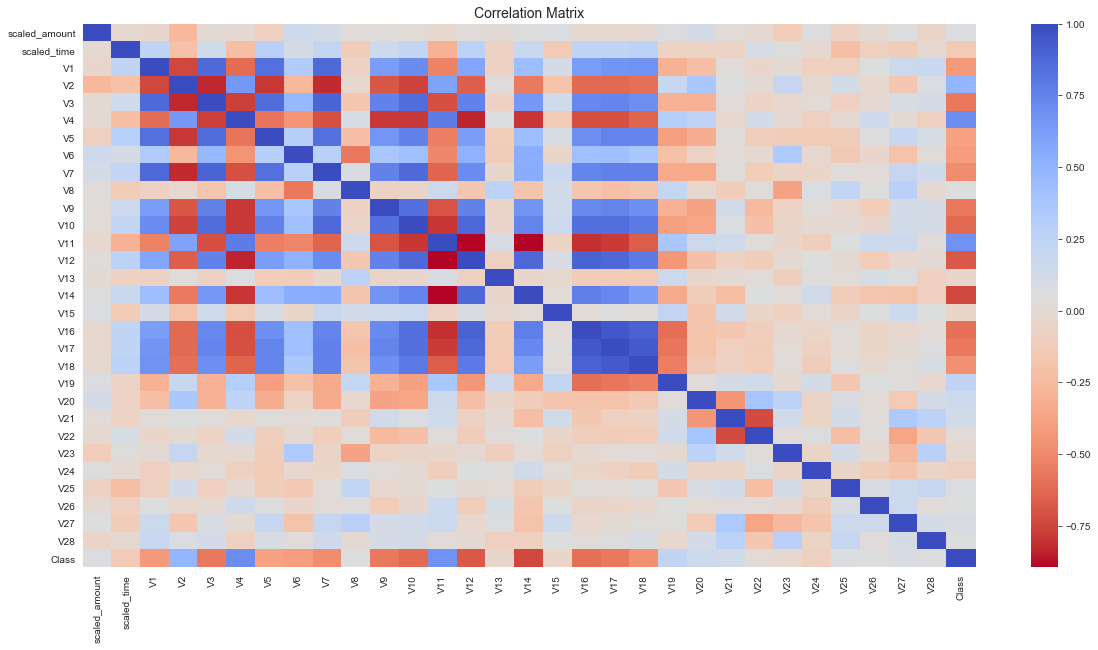

In [18]:
# Make sure we use the subsample in our correlation
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))

# Entire DataFrame
corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix", fontsize=14)


# sub_sample_corr = new_df.corr()
# sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
# ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
# plt.show()

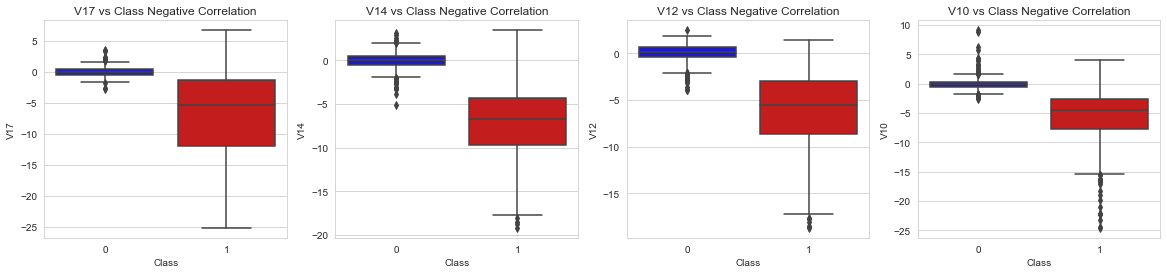

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

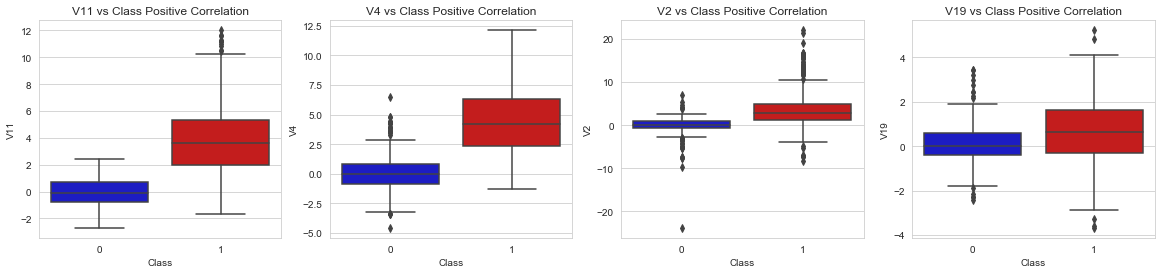

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### Classifiers (UnderSampling):

In [31]:
from sklearn.linear_model import LogisticRegression

# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    # "KNearest": KNeighborsClassifier(),
    # "Support Vector Classifier": SVC(),
    # "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score


In [32]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

In [33]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.77%


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

for key, classifier in classifiers.items():
    clf = classifier

y_proba_lr = clf.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

y_predicted = clf.predict(X_test)
clr = classification_report(y_test, y_predicted, target_names = ['0', '1'])

print('score train:', clf.score(X_train, y_train))
print('score test:', clf.score(X_test, y_test))
print('')
print('AUC', roc_auc_lr)
print('')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predicted))
print('')
print(clr)

score train: 0.9479034307496823
score test: 0.934010152284264

AUC 0.9728317659352143

Confusion Matrix
[[ 84   3]
 [ 10 100]]

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        87
           1       0.97      0.91      0.94       110

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



In [41]:
df.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

### RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

RANDOM_STATE = 2018

target = 'Class'
predictors = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'scaled_amount']

train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

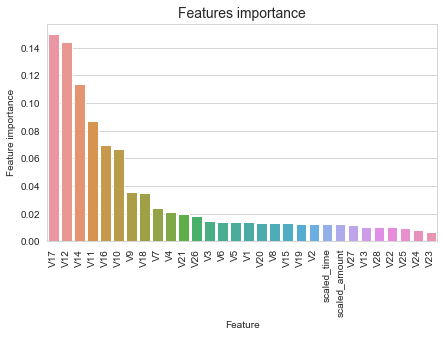

In [47]:
preds = clf.predict(valid_df[predictors])

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

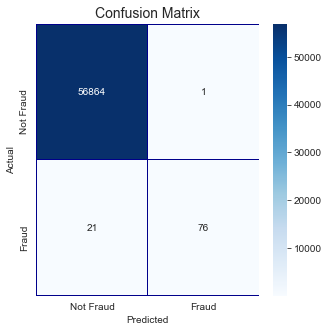

In [77]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
cm[0][0] = str(cm[0][0])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(valid_df[target].values, preds)

0.8917437845648175

In [53]:
train_df.shape

(227845, 31)

In [54]:
valid_df.shape

(56962, 31)

In [60]:
cm

Predicted,0,1
Actual,,
0,56864,1
1,21,76


In [79]:
clr = classification_report(valid_df[target], preds, target_names = ['No Fraud', 'Fraud'])

print('AUC', roc_auc_lr)
print('')
print('Confusion Matrix')
print(confusion_matrix(valid_df[target], preds))
print('')
print(clr)

AUC 0.9728317659352143

Confusion Matrix
[[56864     1]
 [   21    76]]

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56865
       Fraud       0.99      0.78      0.87        97

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962

